In [1]:
import numpy as np, matplotlib.pyplot as plt
from collections import OrderedDict as od
from scipy.special import comb as C
acc_score = od()

In [2]:
def get_entropy_from_culling_factor_v2(c):
    S = od()
    sn = 0
    for E in c:
        S[E] = np.log(c[E])
        S[E] += sn
        sn += np.log(1 - c[E])
    return S

def get_entropy_from_culling_factor_with_heat_v2(c):
    S = od()
    sn = 0
    for E in c:
        S[E] = np.log(c[E])
        S[E] += sn
        sn += np.log(1 - c[E])
    return S

def get_DOS_from_entropy(S):
    g = od()
    Z = 0
    for E, s in S.items():
        t = np.exp(s)
        if t > 0 and E <= -200:
            g[E] = t
            Z += t
    timex = g[-200]
    for E in g:
        g[E] /= timex
    return g

def get_DOS(N):
    DOS = od()
    Z = 0
    for k in range(200, 401, 2):
        DOS[-k] = C(N, k)
        Z += C(N, k)
    timex = DOS[-200]
    for k in range(200, 401, 2):
        DOS[-k] /= timex
    return DOS

In [8]:
for N in [400]:
    for R in [1024 * 1024]:
        for seed in [0]:#, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
            for nSteps in [50]:
                name = "./datasets/1DIsing/1DIsing_N{}_R{}_nSteps{}_run{}X.txt".format(N, R, nSteps, seed)
                culling_factor = od()
                culling_factor[1] = 0
                culling_factor[0] = 0
                print(N, R, nSteps)
                with open(name) as f:
                    for line in f:
                        E, c = map(float, line.split())
                        culling_factor[E] = c

                culling_factor[-400] = 1.0
                DOS = get_DOS(N)
                S = get_entropy_from_culling_factor_v2(culling_factor)
                g = get_DOS_from_entropy(S)





400 1048576 50


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys


In [4]:
print([1024, 2 * 1024, 4 * 1024, 8 * 1024, 16 * 1024, 32 * 1024, 64 * 1024, 128 * 1024, 256 * 1024, 512 * 1024, 1024 * 1024,
 2 * 1024 * 1024, 4 * 1024 * 1024, 8 * 1024 * 1024])
[int(x / 1024) for x in [1024, 2 * 1024, 4 * 1024, 8 * 1024, 16 * 1024, 32 * 1024, 64 * 1024, 128 * 1024, 256 * 1024, 512 * 1024, 1024 * 1024,
 2 * 1024 * 1024, 4 * 1024 * 1024, 8 * 1024 * 1024]]

[1024, 2048, 4096, 8192, 16384, 32768, 65536, 131072, 262144, 524288, 1048576, 2097152, 4194304, 8388608]


[1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192]

<Figure size 1152x648 with 0 Axes>

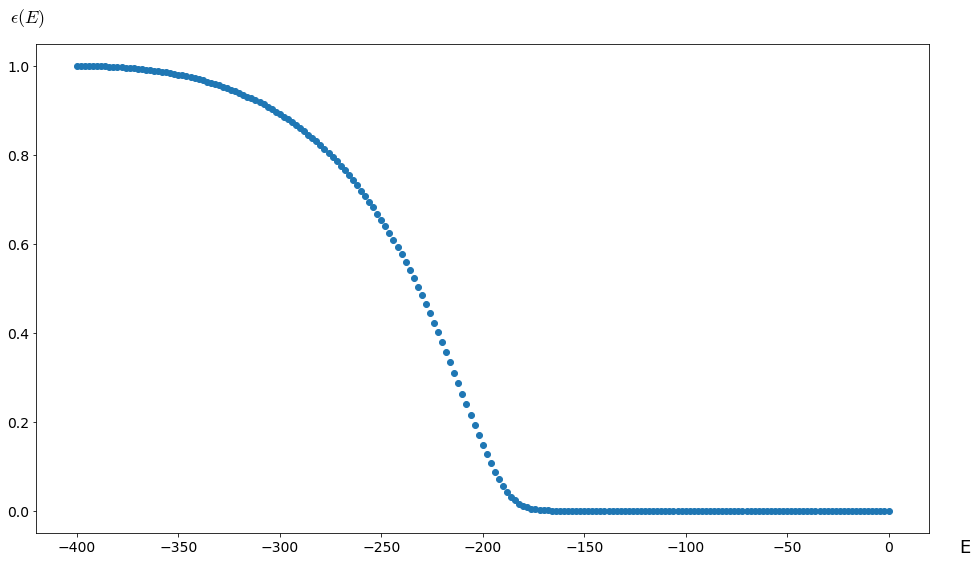

In [9]:
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(16, 9))
threshold = -200
plt.rcParams["mathtext.fontset"] = "cm"
fig, ax = plt.subplots()
fig.set_size_inches(16, 9)
ax.yaxis.set_label_coords(-0.01, 1.03)
ax.xaxis.set_label_coords(1.04, -0.01)

ax.plot([E for E in culling_factor if E % 2 == 0], [c for E, c in culling_factor.items() if E % 2 == 0], 'o')

ax.set_ylabel(r"$\epsilon(E)$", rotation=0, fontsize=18)
ax.set_xlabel("E", fontsize=18)
#plt.yscale("log")
#ax.legend()
#plt.grid()
#plt.show()
fig.savefig("./images/culling_factor_N{}_R{}.png".format(N, R), bbox_inches='tight')

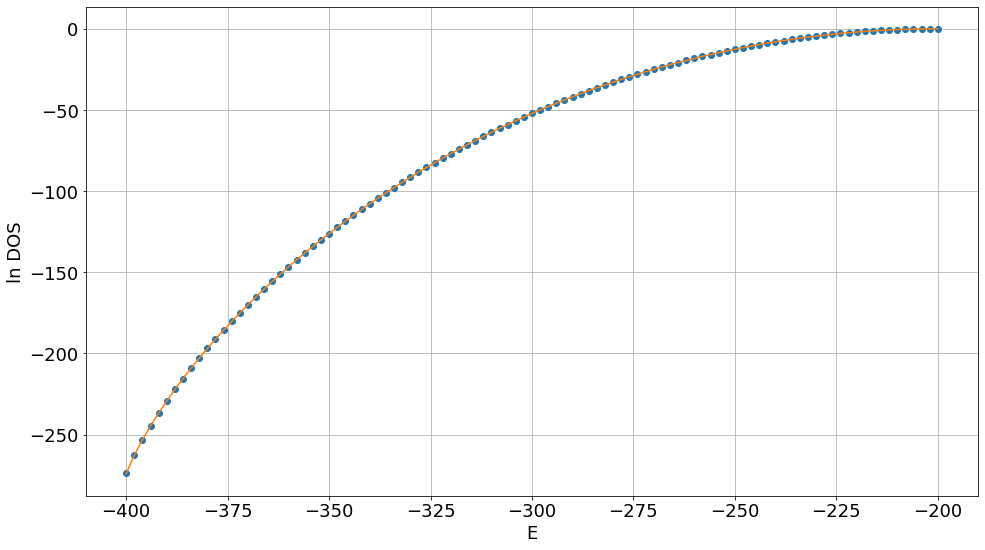

In [14]:
plt.figure(figsize=(16, 9))
threshold = -200
plt.rcParams.update({'font.size': 18})


plt.plot([E for E in g if E <= threshold], [np.log( g[E] ) for E in g if E <= threshold], 'o', label="recovered g(E)")
plt.plot([E for E in DOS if E <= threshold], [np.log( DOS[E] ) for E in DOS if E <= threshold], label="normed C(N, k)".format(N))


plt.xlabel("E")
plt.ylabel("ln DOS")

plt.grid()
#print("./images/recovered_DOS_N{}_R{}.png".format(N, R))
plt.savefig("./images/recovered_DOS_N{}_R{}.png".format(N, R))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in double_scalars


<Figure size 1152x648 with 0 Axes>

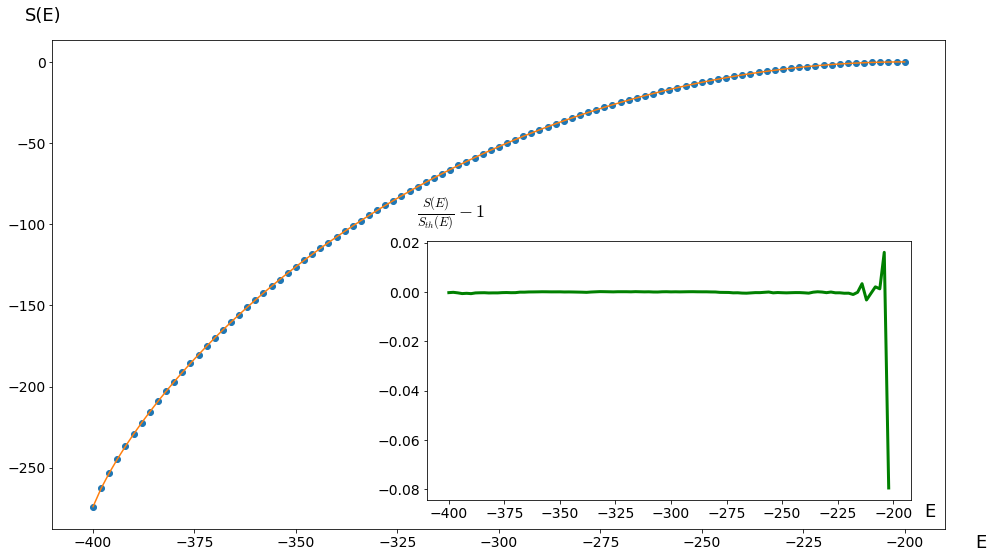

In [33]:
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(16, 9))
threshold = -200
fig, ax1 = plt.subplots()
fig.set_size_inches(16, 9)
ax1.yaxis.set_label_coords(-0.01, 1.03)
ax1.xaxis.set_label_coords(1.04, -0.01)

ax1.plot([E for E in g if E <= threshold], [np.log( g[E] ) for E in g if E <= threshold], 'o', label="recovered g(E)")
ax1.plot([E for E in DOS if E <= threshold], [np.log( DOS[E] ) for E in DOS if E <= threshold],
         label="normed C(N, k)".format(N))

ax1.set_ylabel("S(E)", rotation=0, fontsize=18)
ax1.set_xlabel("E", fontsize=18)

l, b, h, w = .45, .17, .4, .42
ax2 = fig.add_axes([l, b, w, h])

ax2.yaxis.set_label_coords(0.05, 1.03)
ax2.xaxis.set_label_coords(1.04, -0.01)

ax2.plot([E for E in g if E <= threshold], [ (np.log( g[E] ) / np.log( DOS[E] )) - 1 for E in g if E <= threshold], color='green', lw=3, label="inside plot")

ax2.set_ylabel(r"$\frac{S(E)}{S_{th}(E)} -1 $", rotation=0, fontsize=18)
ax2.set_xlabel("E", fontsize=18)

#plt.show()
plt.savefig("./images/recovered_S(E)_N{}_R{}_2.png".format(N, R), bbox_inches='tight')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys
No handles with labels found to put in legend.


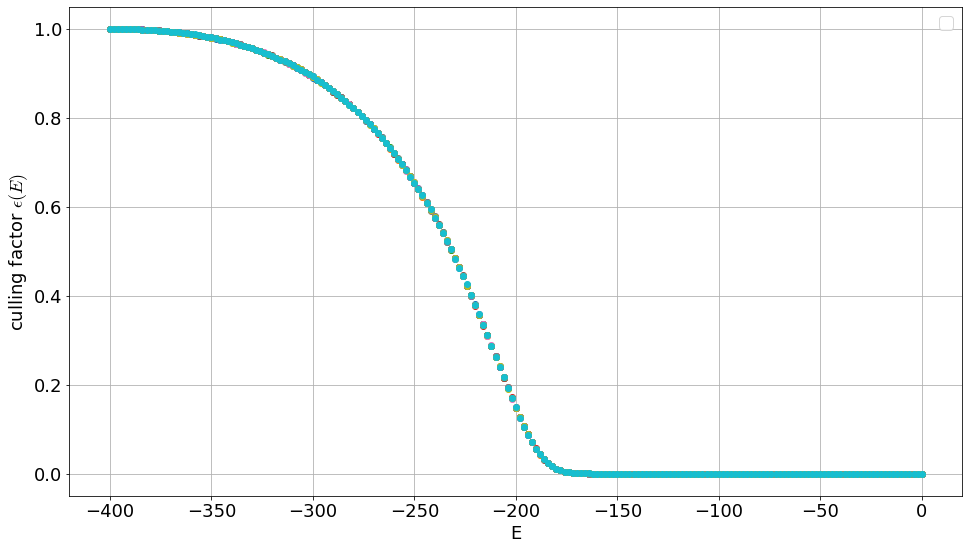

In [9]:
plt.figure(figsize=(16, 9))
threshold = -200
plt.rcParams.update({'font.size': 18})
plt.rcParams["mathtext.fontset"] = "cm"

R=1024 * 256
nSteps=30

for seed in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    name = "./datasets/1DIsing/1DIsing_N{}_R{}_nSteps{}_run{}X.txt".format(N, R, nSteps, seed)
    culling_factor = od()
    culling_factor[1] = 0
    culling_factor[0] = 0
    N = int(name.split("_N")[1].split("_R")[0])
    #        R = int(name.split("_R")[1].split("_nSteps")[0])
    #print(N, R, nSteps, seed)
    with open(name) as f:
        for line in f:
            E, c = map(float, line.split())
            culling_factor[E] = c
    culling_factor[-400] = 1.0

    DOS = get_DOS(N)

    S = get_entropy_from_culling_factor_v2(culling_factor)
    g = get_DOS_from_entropy(S)

    plt.plot([E for E in culling_factor if E % 2 == 0], [c for E, c in culling_factor.items() if E % 2 == 0], 'o')

plt.ylabel(r"culling factor $\epsilon(E)$")
plt.xlabel("E")
#plt.yscale("log")
plt.legend()
plt.grid()
plt.show()
#plt.savefig("./images/culling_factor_N{}_R{}.png".format(N, R))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys


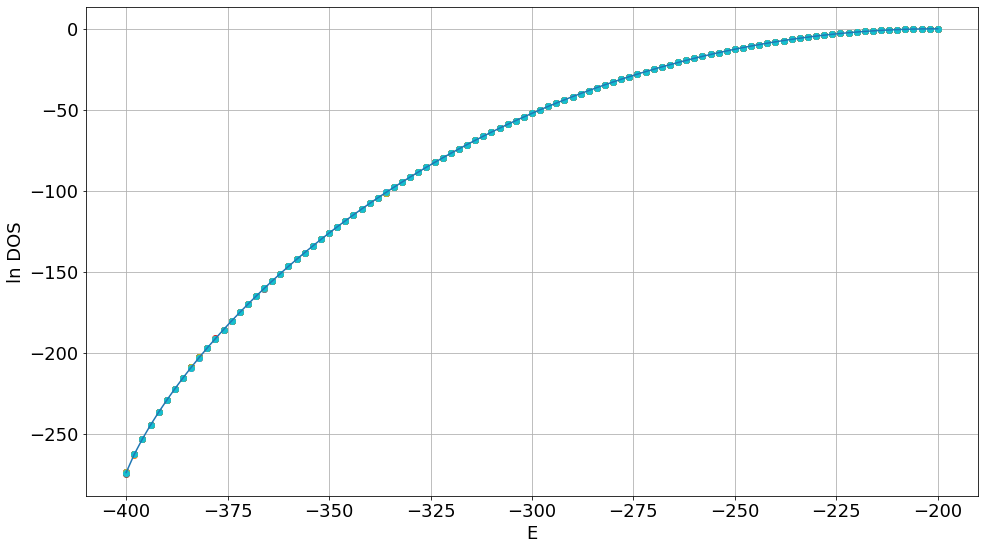

In [10]:
plt.figure(figsize=(16, 9))
threshold = -200
plt.rcParams.update({'font.size': 18})

R = 256 * 1024
nSteps=30
for seed in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    name = "./datasets/1DIsing/1DIsing_N{}_R{}_nSteps{}_run{}X.txt".format(N, R, nSteps, seed)
    culling_factor = od()
    culling_factor[1] = 0
    culling_factor[0] = 0
    N = int(name.split("_N")[1].split("_R")[0])
    #        R = int(name.split("_R")[1].split("_nSteps")[0])
    #print(N, R, nSteps, seed)
    with open(name) as f:
        for line in f:
            E, c = map(float, line.split())
            culling_factor[E] = c
    culling_factor[-400] = 1.0

    DOS = get_DOS(N)

    S = get_entropy_from_culling_factor_v2(culling_factor)
    g = get_DOS_from_entropy(S)

    plt.plot([E for E in g if E <= threshold], [np.log( g[E] ) for E in g if E <= threshold], 'o', label="recovered g(E)")
plt.plot([E for E in DOS if E <= threshold], [np.log( DOS[E] ) for E in DOS if E <= threshold], label="normed C(N, k)".format(N))

plt.xlabel("E")
plt.grid()
plt.ylabel("ln DOS")
plt.show()

R movement

In [25]:
acc_score_plus = od()
acc_score_minus = od()
acc = od()
last_point = od()
N = 400
for nSteps in [30]:#[1, 2, 5, 10, 30, 50]:
    for seed in range(100):
        for R in [256 * 1024]:#, 512 * 1024, 1024 * 1024, 2 * 1024 * 1024]:#, 4 * 1024 * 1024]:#, 4190208, 8388608]: 
            name = "./datasets/1DIsing/1DIsing_N{}_R{}_nSteps{}_run{}X.txt".format(N, R, nSteps, seed)
            culling_factor = od()
            culling_factor[1] = 0
            culling_factor[0] = 0
            with open(name) as f:
                for line in f:
                    E, c = map(float, line.split())
                    culling_factor[E] = c
            culling_factor[-400] = 1.0
            #print(N, R, nSteps, seed)
            DOS = get_DOS(N)

            S = get_entropy_from_culling_factor_v2(culling_factor)
            g = get_DOS_from_entropy(S)

            acc_score[(R, seed, nSteps)] = sum([abs( np.log(g[E]) - np.log(DOS[E]) ) for E in g])
            acc_score_plus[(R, seed, nSteps)] = sum([( np.log(g[E]) / np.log(DOS[E]) ) - 1 for E in g if np.log(DOS[E]) - np.log(g[E]) > 0])
            acc_score_minus[(R, seed, nSteps)] = sum([( np.log(g[E]) / np.log(DOS[E]) ) - 1 for E in g if np.log(DOS[E]) - np.log(g[E]) < 0])
            last_point[(R, seed, nSteps)] = -N in g and not np.isnan(g[-N])


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys


In [26]:
from itertools import groupby

In [27]:
sort_f = lambda x: (x[2], x[0]);
acc_score_keys_list = sorted(acc_score, key=sort_f)
for key, group in groupby(acc_score_keys_list, key=sort_f):
    nSteps, R = key
    acc = [acc_score[x] for x in group]

acc_score_keys_list = sorted(acc_score_plus, key=sort_f)
for key, group in groupby(acc_score_keys_list, key=sort_f):
    nSteps, R = key
    acc_plus = [acc_score_plus[x] for x in group]

acc_score_keys_list = sorted(acc_score_minus, key=sort_f)
for key, group in groupby(acc_score_keys_list, key=sort_f):
    nSteps, R = key
    acc_minus = [acc_score_minus[x] for x in group]


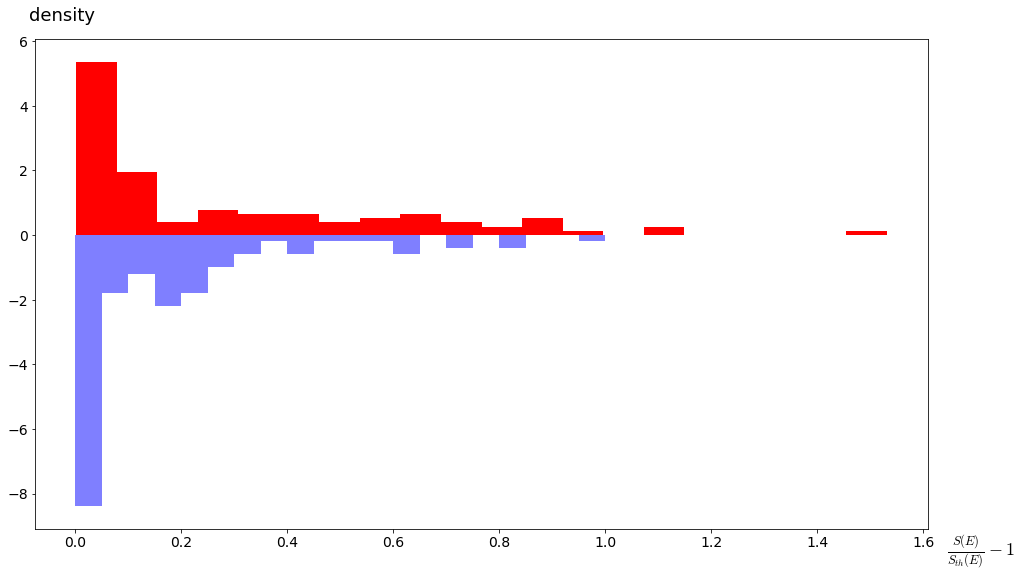

In [28]:
plt.rcParams.update({'font.size': 14})
threshold = -200
fig, ax = plt.subplots()
fig.set_size_inches(16, 9)
ax.yaxis.set_label_coords(0.03, 1.03)
ax.xaxis.set_label_coords(1.06, -0.01)

ax.hist(acc_plus, bins=20, density=True, color='r')


y, x = np.histogram([-x for x in acc_minus], bins=20, density=True)
# Correct bin edge placement
x = [(a + x[i + 1]) / 2.0 for i, a in enumerate(x[0:-1])]

w = abs(x[1]) - abs(x[0])
ax.bar(x, -y, width=w, alpha=0.5, align='center', color='b')

ax.set_ylabel('density', rotation=0, fontsize=18)
ax.set_xlabel(r"$\frac{S(E)}{S_{th}(E)} -1 $", rotation=0, fontsize=18)
plt.savefig("./images/rel_error_density_N{}_R{}_nSteps{}.png".format(N, R, nSteps), bbox_inches='tight')

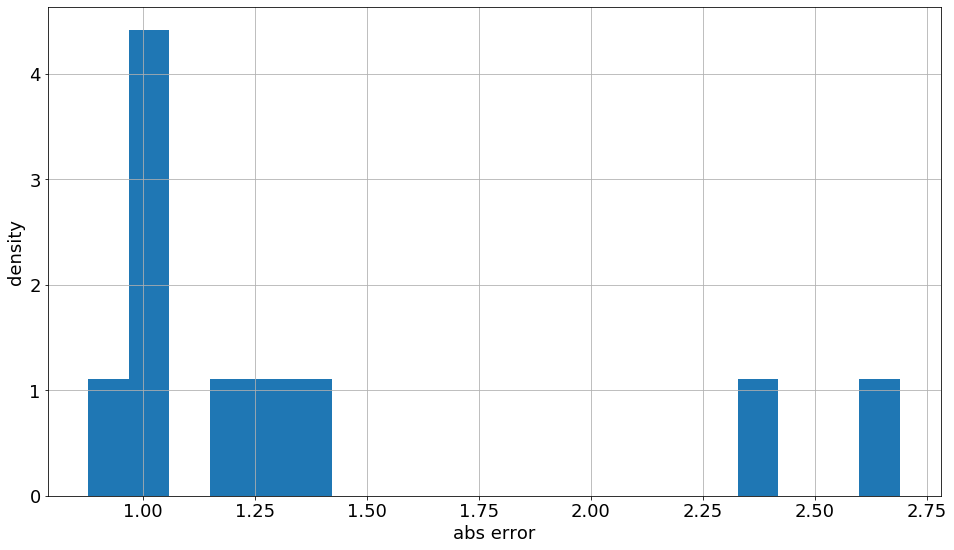

In [20]:
plt.figure(figsize=(16, 9))
plt.rcParams.update({'font.size': 18})

plt.hist(acc, bins=20, density=True)

plt.xlabel("abs error")
plt.grid()
plt.ylabel("density")
plt.show()
#plt.savefig("./images/abs_error_density_N{}_R{}_nSteps{}.png".format(N, R, nSteps))

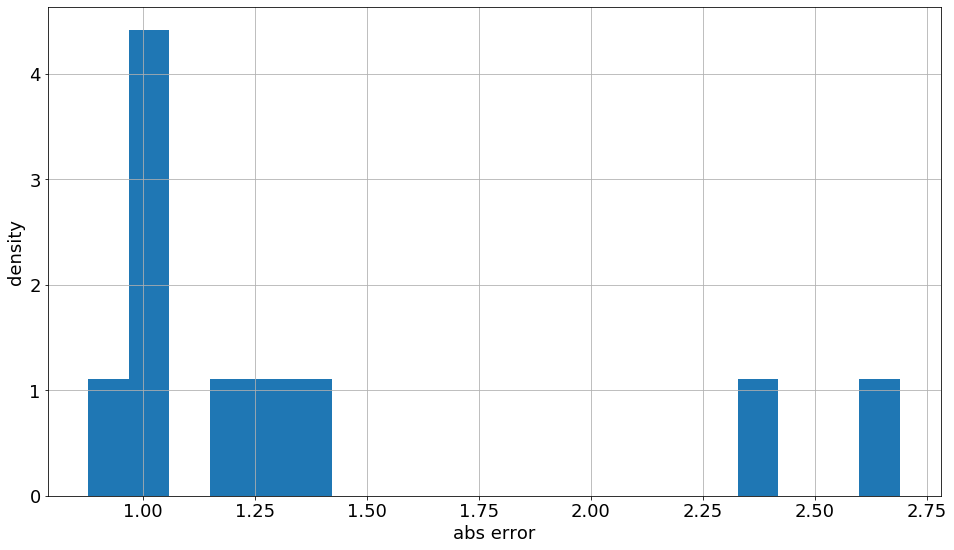

In [21]:
plt.figure(figsize=(16, 9))
plt.rcParams.update({'font.size': 18})

plt.hist(acc, bins=20, density=True)

plt.xlabel("abs error")
plt.grid()
plt.ylabel("density")
plt.show()
#plt.savefig("./images/abs_error_density_N{}_R{}_nSteps{}.png".format(N, R, nSteps))

In [34]:
acc_score_plus = od()
acc_score_minus = od()
acc = od()
last_point = od()
N = 400
for nSteps in [1, 2, 5, 10, 30, 50]:
    for seed in range(10):
        for R in [256 * 1024, 512 * 1024, 1024 * 1024, 2 * 1024 * 1024]:#, 4 * 1024 * 1024]:#, 4190208, 8388608]: 
            name = "./datasets/1DIsing/1DIsing_N{}_R{}_nSteps{}_run{}X.txt".format(N, R, nSteps, seed)
            culling_factor = od()
            culling_factor[1] = 0
            culling_factor[0] = 0
            with open(name) as f:
                for line in f:
                    E, c = map(float, line.split())
                    culling_factor[E] = c
            culling_factor[-400] = 1.0
            #print(N, R, nSteps, seed)
            DOS = get_DOS(N)

            S = get_entropy_from_culling_factor_v2(culling_factor)
            g = get_DOS_from_entropy(S)

            acc_score[(R, seed, nSteps)] = sum([abs( np.log(g[E]) - np.log(DOS[E]) ) for E in g])
            acc_score_plus[(R, seed, nSteps)] = sum([( np.log(g[E]) / np.log(DOS[E]) ) - 1 for E in g if np.log(DOS[E]) - np.log(g[E]) > 0])
            acc_score_minus[(R, seed, nSteps)] = sum([( np.log(g[E]) / np.log(DOS[E]) ) - 1 for E in g if np.log(DOS[E]) - np.log(g[E]) < 0])
            last_point[(R, seed, nSteps)] = -N in g and not np.isnan(g[-N])


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys


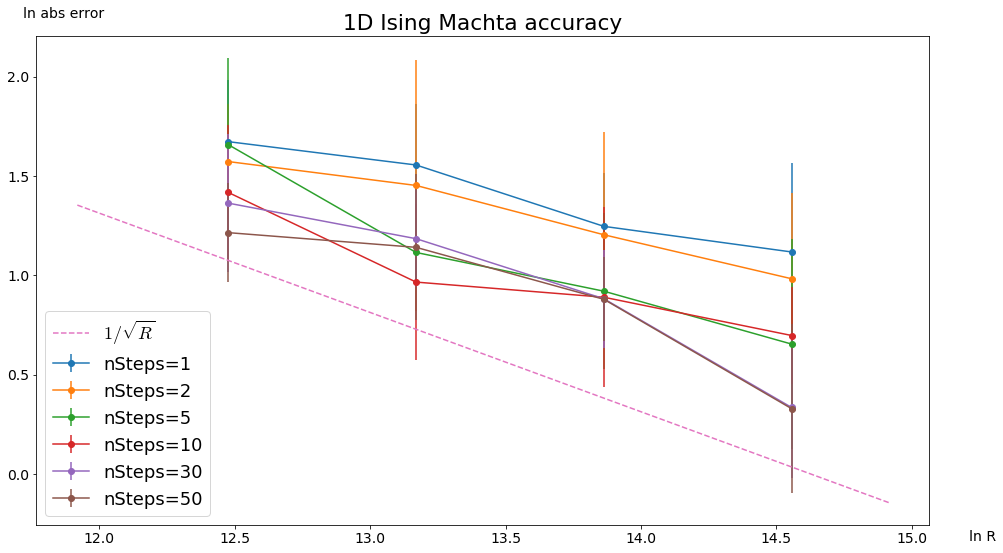

In [42]:
plt.rcParams.update({'font.size': 14})
threshold = -200
fig, ax = plt.subplots()
fig.set_size_inches(16, 9)
ax.yaxis.set_label_coords(0.03, 1.03)
ax.xaxis.set_label_coords(1.06, -0.01)

sort_f = lambda x: (x[2], x[0]);
threshold = -200
plt.rcParams.update({'font.size': 18})
plt.rcParams["mathtext.fontset"] = "cm"

for z in [1, 2, 5, 10, 30, 50]:
    x, y, ye = [], [], []
    acc_score_keys_list = sorted(acc_score, key=sort_f)
    for key, group in groupby(acc_score_keys_list, key=sort_f):
        nSteps, R = key
        if nSteps != z: continue;
        #print(nSteps, R)
        acc = [acc_score[x] for x in group]
        #print([acc_score[x] for x in group])
        #plt.hist([acc_score[x] for x in group], bins=3)
        x.append(R)
        y.append(np.mean(acc))
        ye.append(np.std(acc))

    plt.errorbar(np.log(x), np.log(y), np.array(ye) / y, fmt='-o', label="nSteps={}".format(z))

r = [3000000, 150000]
plt.plot(np.log(r), np.log([1500/np.sqrt(y) for y in r]), '--', label="$1/\sqrt{R}$")

plt.title("1D Ising Machta accuracy")
plt.legend()
plt.ylabel("ln abs error", rotation=0)
plt.xlabel("ln R")
#plt.xscale("log")
#plt.yscale("log")
#plt.grid()
#plt.show()
plt.savefig("./images/1DisingMachtaAccuracy.png", bbox_inches='tight')